In [1]:
import Pkg; Pkg.activate("C:/Users/s151781/AppData/Local/Julia-1.3.1/GN/Project.toml")
using Revise
using Distributions
using PyPlot
using FFTW
using Compat
using WAV
using DSP
using Base64
using ForneyLab
using LinearAlgebra
using ProgressMeter
using Distributed

include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/auxiliary/fourier.jl")
include("../functions/auxiliary/visualization.jl")
include("../functions/auxiliary/buffer.jl")
include("../functions/auxiliary/warpedfilter.jl")
include("../functions/preprocessing.jl")
include("ARFB_fast_cossin.jl")

Activating environment at `C:\Users\s151781\AppData\Local\Julia-1.3.1\GN\Project.toml`


In [2]:
# load speech data
xi, fs = wavread("../data/leaves.wav", format="native")
fs = Int(fs)
xi = convert(Array{Float64,1}, xi[1*fs:4*fs])

# pre-process signals
yi = preprocess(xi, fs) 

N = length(yi)
t = collect(1:N)/8000
fs = 8000

audioplayers(yi, fs=8000);

<source src="data:audio/wav;base64,UklGRkB3AQBXQVZFZm10ICgAAAD+/wEAQB8AAAB9AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQR3AQDK80G94H7ZvTg4mb01RXC9sSnKPDokebzHbAO8i29PPZ65hz2IW5m66eC1PKIiz70AB4m9pjJTvWuxwLttCTk9v1WhPTkpdT1FlK08dg8pvTRoMz0dWJw9d3qiPQgQWT1tSL48SvssvQHwPLwAwSO84dBPuyay5jwyE/Q7rJOdPQEsIztWYby8uJ24vX9mZ72fhvG9Z3Xevc+Jwr2dvMO90uiiPG59G7yuFP88CJ26PRInHD3WdGg9fNxXPVUxtTx6f8c9qWwLPXSDajxAtXO7+VitvKNcFztdQ+E7C0mCuprfMLxr7Xo9lyoxOyQ7RzxiKZq78yxLu09hlTtiTCA9C4c6PZbEXr3E8A+8g02rO6jigzxxdpY7ha5bPdDeB7zYFQK8b6Ukvbu4pby2fL68DXdjPTT5ujwDk8A96LIwvUOqOjsU4G+9Rtzrvf3eYr18xBC7VxuWvUFFaL1ksAC8/ISOPVRICj08jV08KUULvWnktL2de5m9UhS/vcS5zrw4emi9VARuu0dbqr1ylzK80tPfuwECOz3NP6A9eIOUvBukNz1gezI9lGHfPJHD0byEzvS6NQ4nveeqbj2Yq9M8aTpYPH9kNj60yM28CVaPPfcZo7xK48i8dVtEPIzCgT0kBKE9dZxePCMBTT2XD1o9vFqFvNyO6ruzH4+8GJqdvaSMvrx80Y69sSjSvHqV9zxO7hc9GbMSPP3E6bx7PUO9kpoPvEcIHT18Gk09nqnKvA9koLwg/8a9sT/yvAoMJL2abC6984M5vZPGKr11VoC9ChvIvYL6jL1q7QK9timPPSEOmT2Tb6o97QT0PWIIjT1RxAw8CF7Su0S0LbyPGzU9XwsBuyxM1z0iSZm9iUJMvZkdbLsaUAY9XmujPV3RjzwWGwW9Qpg6PQpg/DwcHGU9OjMFPU2ABLtrz7u8WvudvBB3ULoLHd+6Qoh6vaAqB7zsuYA72V5+PcH6tbwyJXS8zS+CvVgStLxgkZ09il+APZXMuT3i5qs9Fqwsu2DtYT0HY2S84P92vWMRa70BI3e7zRQ/vb4F6bzY5zq+AiQIvgMc+Lz//gu94XZVvQusTLzTs4c8RKBPvFj5Tb1xfSk9pMc+PUh9j7zBDYy9tyOMvaV4tr0PXGC9VP8xPb65kT2AbJM8yxXfvPkd2zyV0FW7+a3IOutz8z3EhG49CJqhPdAhCj7yjBw+d/GYPcRRDDu1JA28SSFyO0s+mz3HLa89WIs8vfIN0byFory9LeXavb/AQjxD/bG9j2hZvBRV0jwzqze9BJyWPeAu/j3bGL89pcgVPvZEzz0DMZm8mk+dPTgV+TxXas28llh+u4uQLL57vQC+8M2cvVpVvr15pWe9fBfEvTwc6bxVC4M82ANAPC3Phr3AzKC9RedKPKaTtL2sKsc9Oa0dPttBoDx2mzy9LLK/vSgX47w6iHo8Y6KxvDewir2VdZo8hgJ8PN6U4ruRyXu7XQyevEVCmzybpeg80Wcau8FVQ70M4Og9b1p9PD4f/zzfqYG9pKvvvEoQoTwVhPo7LmIYPPpAez0OO687yZcVPOfq5jxC/xe9rkgmPT9Jvz1rMI887bGbvJrCzzwI8Jw9pQmNPWz9m730Uh69RmEvvfXRfb0bIGe89yYDvZfZaz2SQW08CKUOvUy2ND3tNtY9pWe7PR5WaL1OLbq9dQ/3vAmbtr1uYY294iLevAq1KT12C5e9D3n0vCbYtb1HCZu9KaeUvN75Nj3jQaU8gisEvW+D3Dk7RxC92vOZvesZEz2ZfOo9r6QRPgwV1z263KA90vuqPfoeeT1NSxU9j7BIPWVeWT2kMsk8xMsgPblcTjzcmYY8DVutN7rhAr2NV4m8o6qEvAT5QrsLluk6Aq4QPcpbkLnR4Ui9QdwSvXPIsr28vCy+71lHvgGkkL2w1hs8ttnHPBrYqDuK/0S81IOIvVOzRDyX3V49DKQGPfHDqD2B0Zm76xc7vbq0yTzTn2s8TfMTvePVB732VRS8UTlnvDlq9jsMTPK86FelvYR2vL3RN1O9KtSAvaNZr7zHrCw9Te/YPFm2qT1ELG49OCPGvC4Nkb0RuRO6kAw1vY+80Du8V+E9S28HPtRGIT2A6og9Nl1CPBHMWz2KQbk8ryidPQEb+T2DUYA9lpWxPdrh4zyx3nQ9bIHcvEVuKLvGmyg6cHW6vAR6H70WDtS9ZZWTveohgb0Qots8zBf4PQ4Zlz3T44E9sugoPSGeEz06Ffa8QrzMvJdI6TuQqMy9YbULvg/XIr4HJtK9zYGJvdpzgLwzJ5S7WhWmvU6o3bi/qC89V7pGPEAUwDzgWSY9VJQ4PVjF+Tyjmr87P1+DPQGNWz2JRPQ8wvMbPV6zGD2/EUQ9SWDevCzlM72wIr69NSSUvUC0e72v4wK+pADxvcBsr72rEcm7gjv/PN/k5TwqvR09jSSePDGJhz1TyqA9+rS9PZ9LPT18PpA9SxuvPMhr0r0wWli9BYvEPFOxdDz+Wui7I1gLPfMIE7y0+y08XoQ6vdr+cL3fBrE8skqKPYH7gzwmJAQ9Ai4mPVcyY71lA7A734IKvP8rlDyMZUY9UdxJvZsLxDzC5H29OnyVvZYZorvPvoM9Wr6tPbpfOrxMBzw9D8h1PUqrIb2gG8U7sxtZPTUIXbycf6a8RReOPDqig7wimY6991iSO67pn7wshQa9uJ0Eut30Tr2XLS28lqspPSLJnL19yu68NyFuPTf0JT5C+L0970GcvVJJp73e6hi7fkNBPb3yCb3MhGo8F1k7vSrpg72xl8a8K5yRvf4A6b3iqG29LUD3vDSIxj3qtfQ9yTZnPQW7uz3w+Pw9xG53Pc0aDz1SfmY8xe5zvQh2zr12qhq+L8oRvpTHSr2bGj09Qj4APtV9vj1G8tY7/VDOOwBBgLtL1Qq9cjdOPRbowzzjBNW79RTsPMjWLL0Vei69Ci2PvY/THT3WQHw96CT3PBBfZL0r3IK9zPmZPJKHoTxxJ0U9tqmPPYOfcL3WBc296vGxvFBhrbwEQm+7RWfGPEKXPj38f0E9rnkDPlhcqj3lJ3s9hLoXPcxj5zt/Vk87kY1ovAD8jr12GM+8rnbSvXG6AL4Fpo+95twqvNrRXr2eMni9dRvNvTxULr57Eay91ll5vcsKOT1TdHA9mQRRu1jHVD2+raQ9XIqiPP9XpD1E4pw9bI0gPUrXNT3AEYk9jrpaPJhGlDy1L+49EujOPE0MvTxFSiI8PhdHvN/L5z2AYw88A/+PvN4rFz3LjfA8LjmFum7jDT1R2KI7eufXurakP72CJYm9XR9tvDYkWb0rkR69uYtgvIw4cL3eI4y9m6Cuur3SLjygmsY9wlQoPQq9VLyQXMg7wh5+vPbSmr3z7ay86R5APQDH6jxh96M9yIUYuwapVr3bmwi9kYLcvYAEv725KIi9CIJ6vRTOrjx2nca8QvAFvX1KOT0xPKI8yfShvV0Sq7x24dg8tVUMPUnjez3CqOM9hQymPWC18Txl4bg9LkJ6PLCYvrwwJUe8K39rvdB4G72c+lK9BxpmPD8VrzzJt4Y7C88EPTzgLTuPSSw94ywAverwkbwnr5G608oFvXEL3Lz6Pr+9Ye8BvdZ7dD20jfC4BaswvYJlaL0hqpi99v1kvT5YKD2AdiC85ltuPFh+ETwf1CY9wpt8PAraoj3P0Ig96GSJPOQmszzF95i9ITr/O/EFSbx7lYS9ivvYvBgMA72xdcc9yw4GPkz9eD2wFAA+pSe6PQaHrz3jkqg8OalUPU1gijy4np09nt15PcT4ar1HlTu8168zvlXuiTxBB6Y9VPhKveyJ9rwpIxG+IdTTvUDLMb2Ince8g30ovoOpBb3JNJy9fGOrPawNXz1y2

In [3]:
f = collect(0:fs/25:fs/2)
bufsize = 1#length(f)
z_pole = 0.4092 
W, U, S = allpass_update_matrix_segment(length(f), bufsize, z_pole)

# create fg
fg = FactorGraph()

# auto-regressive filter bank
@RV [id=:smin] smin ~ GaussianMeanVariance(placeholder(:Œº_smin, dims=(2*length(f),)), placeholder(:Œ£_smin, dims=(2*length(f),2*length(f))))
@RV [id=:Œ∏] Œ∏ ~ GaussianMeanVariance(placeholder(:Œº_Œ∏, dims=(length(f),)), placeholder(:Œ£_Œ∏, dims=(length(f),length(f))))
@RV [id=:Œ≥] Œ≥ ~ GammaVector(placeholder(:a_Œ≥, dims=(length(f),)), placeholder(:b_Œ≥, dims=(length(f),)))
@RV [id=:s] s ~ AutoregressiveFilterbank(smin, Œ∏, Œ≥)

# frequency warping
@RV [id=:taps] taps = placeholder(:c, dims=(length(f),2*length(f))) * s
@RV [id=:Ymin] Ymin ~ GaussianMeanVariance(placeholder(:Œº_Ymin, dims=(2*length(f),)), placeholder(:Œ£_Ymin, dims=(2*length(f),2*length(f))))
@RV [id=:x] x
@RV [id=:Y] Y = W*Ymin + U*x
Multiplication(taps, Y, S)
@RV [id=:y] y ~ GaussianMeanVariance(x, placeholder(:Œ£_x, dims=(1,1)))
placeholder(y, :y, dims=(1,))
       
q = PosteriorFactorization(smin, s, Œ∏, Œ≥, ids=[:smin, :s, :Œ∏, :Œ≥])

ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 6447113522598389879 -->
 6447113522598389879 
 
 ùí© 
 gaussianmeanvariance_3 
 
<!-- 13014284195728626398 -->
 13014284195728626398 
 
 placeholder_Œº_Ymin 
 
<!-- 6447113522598389879--13014284195728626398 -->
 6447113522598389879--13014284195728626398 
 
 Œº_Ymin 
 1 out 
 2 m 
 
<!-- 6567885804414575638 -->
 6567885804414575638 
 
 placeholder_Œ£_Ymin 
 
<!-- 6447113522598389879--6567885804414575638 -->
 6447113522598389879--6567885804414575638 
 
 Œ£_Ymin 
 1 out 
 3 v 
 
<!-- 5718115163863301269 -->
 5718115163863301269 
 
 √ó 
 multiplication_2 
 
<!-- 5718115163863301269--6447113522598389879 -->
 5718115163863301269--6447113522598389879 
 
 Ymin 
 1 out 
 2 in1 
 
<!-- 10267050563763250701 -->
 10267050563763250701 
 
 clamp_1 
 
<!-- 5718115163863301269--10267050563763250701 -->
 5718115163863301269--10267050563763250701 
 
 clamp_1 
 1 out 
 3 a 
 
<!-- 6269047760833417850 -->
 6269047760833417850 
 
 placeholder_Œº_smin 
 
<!-- 5253261076151381191 -->
 5253261076151381191 
 
 GammaVector 
 gammavector_1 
 
<!-- 6476482333421179176 -->
 6476482333421179176 
 
 placeholder_b_Œ≥ 
 
<!-- 5253261076151381191--6476482333421179176 -->
 5253261076151381191--6476482333421179176 
 
 b_Œ≥ 
 1 out 
 3 b 
 
<!-- 12761782967460514887 -->
 12761782967460514887 
 
 placeholder_a_Œ≥ 
 
<!-- 5253261076151381191--12761782967460514887 -->
 5253261076151381191--12761782967460514887 
 
 a_Œ≥ 
 1 out 
 2 a 
 
<!-- 17679525387663701716 -->
 17679525387663701716 
 
 placeholder_c 
 
<!-- 12834129335319391455 -->
 12834129335319391455 
 
 √ó 
 multiplication_1 
 
<!-- 12834129335319391455--17679525387663701716 -->
 12834129335319391455--17679525387663701716 
 
 c 
 1 out 
 3 a 
 
<!-- 16700876243366698477 -->
 16700876243366698477 
 
 AutoregressiveFilterbank 
 autoregressivefilterbank_1 
 
<!-- 12834129335319391455--16700876243366698477 -->
 12834129335319391455--16700876243366698477 
 
 s 
 1 y 
 2 in1 
 
<!-- 5651888138664568482 -->
 5651888138664568482 
 
 placeholder_y 
 
<!-- 6412252683211473625 -->
 6412252683211473625 
 
 ùí© 
 gaussianmeanvariance_4 
 
<!-- 5651888138664568482--6412252683211473625 -->
 5651888138664568482--6412252683211473625 
 
 y 
 1 out 
 1 out 
 
<!-- 1688191970566590628 -->
 1688191970566590628 
 
 √ó 
 multiplication_4 
 
<!-- 1688191970566590628--12834129335319391455 -->
 1688191970566590628--12834129335319391455 
 
 taps 
 1 out 
 1 out 
 
<!-- 12453445376817303141 -->
 12453445376817303141 
 
 + 
 addition_1 
 
<!-- 1688191970566590628--12453445376817303141 -->
 1688191970566590628--12453445376817303141 
 
 Y 
 1 out 
 2 in1 
 
<!-- 9786310211903519698 -->
 9786310211903519698 
 
 clamp_3 
 
<!-- 1688191970566590628--9786310211903519698 -->
 1688191970566590628--9786310211903519698 
 
 clamp_3 
 1 out 
 3 a 
 
<!-- 16432051469730580943 -->
 16432051469730580943 
 
 √ó 
 multiplication_3 
 
<!-- 7549916539364516714 -->
 7549916539364516714 
 
 clamp_2 
 
<!-- 16432051469730580943--7549916539364516714 -->
 16432051469730580943--7549916539364516714 
 
 clamp_2 
 1 out 
 3 a 
 
<!-- 8749719440188393165 -->
 8749719440188393165 
 
 placeholder_Œ£_Œ∏ 
 
<!-- 57539604218774431 -->
 57539604218774431 
 
 ùí© 
 gaussianmeanvariance_2 
 
<!-- 57539604218774431--8749719440188393165 -->
 57539604218774431--8749719440188393165 
 
 Œ£_Œ∏ 
 1 out 
 3 v 
 
<!-- 3504455687946927603 -->
 3504455687946927603 
 
 placeholder_Œº_Œ∏ 
 
<!-- 57539604218774431--3504455687946927603 -->
 57539604218774431--3504455687946927603 
 
 Œº_Œ∏ 
 1 out 
 2

In [4]:
# generate algorithm
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))

# fix stupid univariate RV to vector issue (caused by [ ; ; ; ] still creating a 1-D array)
add_dim(x::Array) = reshape(x, (size(x)...,1))
source_code = replace(source_code, "messages[7] = ruleSPMultiplicationIn1GNP(messages[6], nothing, Message(MatrixVariate, PointMass, m=[1.0; 0.0; -0.4092; 0.0; 0.16744464; 0.0; -0.068518346688; 0.0; 0.0280377074647296; 0.0; -0.011473029894567353; 0.0; 0.004694763832856961; 0.0; -0.0019210973604050683; 0.0; 0.0007861130398777539; 0.0; -0.0003216774559179769; 0.0; 0.00013163041496163616; 0.0; -5.386316580230151e-5; 0.0; 2.204080744630178e-5; 0.0]))" => "messages[7] = ruleSPMultiplicationIn1GNP(messages[6], nothing, Message(MatrixVariate, PointMass, m=add_dim([1.0; 0.0; -0.4092; 0.0; 0.16744464; 0.0; -0.068518346688; 0.0; 0.0280377074647296; 0.0; -0.011473029894567353; 0.0; 0.004694763832856961; 0.0; -0.0019210973604050683; 0.0; 0.0007861130398777539; 0.0; -0.0003216774559179769; 0.0; 0.00013163041496163616; 0.0; -5.386316580230151e-5; 0.0; 2.204080744630178e-5; 0.0])))")
source_code = replace(source_code, "messages[9] = ruleSPMultiplicationOutNGP(nothing, messages[8], Message(MatrixVariate, PointMass, m=[1.0; 0.0; -0.4092; 0.0; 0.16744464; 0.0; -0.068518346688; 0.0; 0.0280377074647296; 0.0; -0.011473029894567353; 0.0; 0.004694763832856961; 0.0; -0.0019210973604050683; 0.0; 0.0007861130398777539; 0.0; -0.0003216774559179769; 0.0; 0.00013163041496163616; 0.0; -5.386316580230151e-5; 0.0; 2.204080744630178e-5; 0.0]))" => "messages[9] = ruleSPMultiplicationOutNGP(nothing, messages[8], Message(MatrixVariate, PointMass, m=add_dim([1.0; 0.0; -0.4092; 0.0; 0.16744464; 0.0; -0.068518346688; 0.0; 0.0280377074647296; 0.0; -0.011473029894567353; 0.0; 0.004694763832856961; 0.0; -0.0019210973604050683; 0.0; 0.0007861130398777539; 0.0; -0.0003216774559179769; 0.0; 0.00013163041496163616; 0.0; -5.386316580230151e-5; 0.0; 2.204080744630178e-5; 0.0])))")

eval(Meta.parse(source_code))
println(source_code)

begin

function stepŒ≥!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaVectorOut(nothing, ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:a_Œ≥]), ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:b_Œ≥]))
messages[2] = ruleVariationalARFBIn3PPPN(marginals[:s], marginals[:smin], marginals[:Œ∏], nothing)

marginals[:Œ≥] = messages[1].dist * messages[2].dist

return marginals

end

function steps!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 14))

messages[1] = ruleVariationalARFBOutNPPP(nothing, marginals[:smin], marginals[:Œ∏], marginals[:Œ≥])
messages[2] = ruleSPMultiplicationOutNGP(nothing, messages[1], Message(MatrixVariate, PointMass, m=data[:c]))
messages[3] = ruleSPMultiplicationIn1GNP(messages[2], nothing, Message(MatrixVariate, PointMass, m=[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [5]:
Œº_Œ∏_mem = Array{Float64,2}(undef, N, length(f))
Œ£_Œ∏_mem = Array{Float64,2}(undef, N, length(f))
m_Œ≥_mem = Array{Float64,2}(undef, N, length(f))
Œº_x_mem = Array{Float64,1}(undef, N)
Œ£_x_mem = Array{Float64,1}(undef, N)

# priors
Œº_smin = zeros(2*length(f))
Œ£_smin = 0.1*Ic(2*length(f))
Œº_Ymin = zeros(2*length(f))
Œ£_Ymin = 0.1*Ic(2*length(f))
Œº_Œ∏ = 0.0*ones(length(f))
Œ£_Œ∏ = 0.5*Ic(length(f))
a_Œ≥ = 1.0*ones(length(f))
b_Œ≥ = 0.00001*ones(length(f))
Œ£_x = 0.01*0.01*Ic(bufsize)

p = Progress(N-length(f))

for n = length(f):N
    
    next!(p)
    
    # fill marginals dictionary
    marginals = Dict()
    marginals[:smin] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=Œº_smin, v=Œ£_smin)
    marginals[:Œ∏] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=Œº_Œ∏, v=Œ£_Œ∏)
    marginals[:Œ≥] = ProbabilityDistribution(ForneyLab.Multivariate, GammaVector, a=a_Œ≥, b=b_Œ≥)
    
    # fill data dictionary
    data = Dict()
    data[:Œº_smin] = Œº_smin
    data[:Œ£_smin] = Œ£_smin
    data[:Œº_Ymin] = Œº_Ymin
    data[:Œ£_Ymin] = Œ£_Ymin
    data[:Œº_Œ∏] = Œº_Œ∏
    data[:Œ£_Œ∏] = Œ£_Œ∏
    data[:a_Œ≥] = a_Œ≥
    data[:b_Œ≥] = b_Œ≥
    data[:c] = reshape( [cos.(2*pi*f*t[n-length(f)+1:n]') sin.(2*pi*f*t[n-length(f)+1:n]')]', length(f), 2*length(f))
    data[:Œ£_x] = Œ£_x*Ic(bufsize)
    data[:y] = yi[n-bufsize+1:n]   
    
    # make prediction
    messages = Array{Message}(undef, 14)
    Base.invokelatest(steps!, data, marginals, messages)
    Œº_x_mem[n] = ForneyLab.unsafeMean(messages[7].dist)[end]
    Œ£_x_mem[n] = ForneyLab.unsafeCov(messages[7].dist)[end,end]
    
    # perform updates
    for _ in 1:5
        Base.invokelatest(steps!, data, marginals)
        Base.invokelatest(stepŒ∏!, data, marginals)
        Base.invokelatest(stepŒ≥!, data, marginals)
        Base.invokelatest(stepsmin!, data, marginals)
    end
    Base.invokelatest(steps!, data, marginals, messages)
    
    # update parameters
    Œº_smin = ForneyLab.unsafeMean(marginals[:s])
    Œ£_smin = ForneyLab.unsafeCov(marginals[:s])
    Œº_Œ∏ = ForneyLab.unsafeMean(marginals[:Œ∏])
    Œ£_Œ∏ = ForneyLab.unsafeCov(marginals[:Œ∏])
    a_Œ≥ = marginals[:Œ≥].params[:a]
    b_Œ≥ = marginals[:Œ≥].params[:b]
    Œº_Ymin = ForneyLab.unsafeMean(messages[3].dist * messages[10].dist)
    Œ£_Ymin = ForneyLab.unsafeCov(messages[3].dist * messages[10].dist)

    # save parameters
    Œº_Œ∏_mem[n,:] = Œº_Œ∏
    Œ£_Œ∏_mem[n,:] = diag(Œ£_Œ∏)
    m_Œ≥_mem[n,:] = a_Œ≥ ./ b_Œ≥
    
end

Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| Time: 0:05:02:189m9mmm9mmm


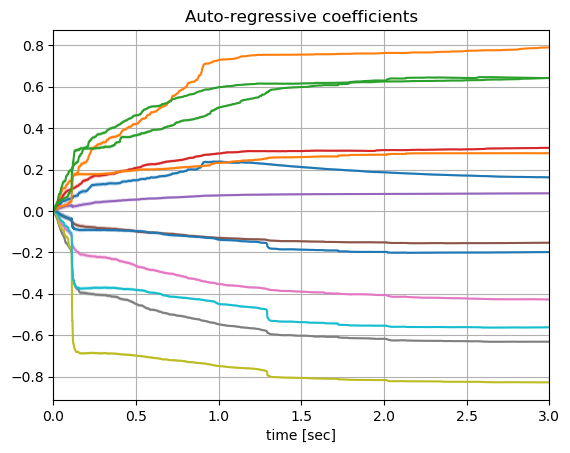

(nothing, PyObject Text(0.5, 1.0, 'Auto-regressive coefficients'), PyObject Text(0.5, 24.0, 'time [sec]'), (0, 3))

In [6]:
for k = 1:size(Œº_Œ∏_mem,2)
    plt.plot(t[bufsize:end], Œº_Œ∏_mem[bufsize:end,k])
    plt.fill_between(t[bufsize:end], Œº_Œ∏_mem[bufsize:end,k].+sqrt.(Œ£_Œ∏_mem[bufsize:end,k]), Œº_Œ∏_mem[bufsize:end,k].-sqrt.(Œ£_Œ∏_mem[bufsize:end,k]), alpha=0.3)
end
plt.grid(), plt.title("Auto-regressive coefficients"), plt.xlabel("time [sec]"), plt.xlim(0, 3)

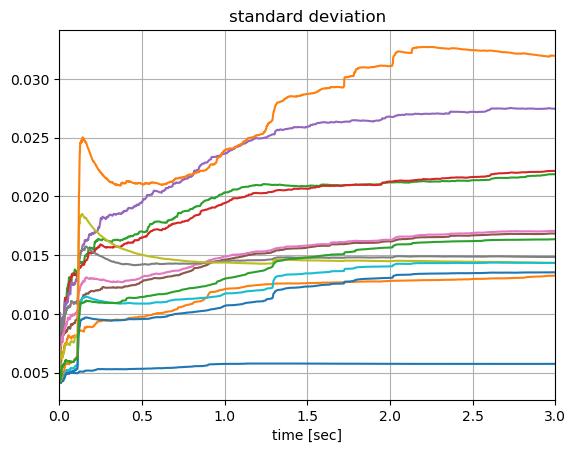

(nothing, PyObject Text(0.5, 1.0, 'standard deviation'), PyObject Text(0.5, 24.0, 'time [sec]'), (0, 3))

In [7]:
plt.plot(t[bufsize:end,:], 1 ./ sqrt.(m_Œ≥_mem[bufsize:end,:]))
plt.grid(), plt.title("standard deviation"), plt.xlabel("time [sec]"), plt.xlim(0, 3)

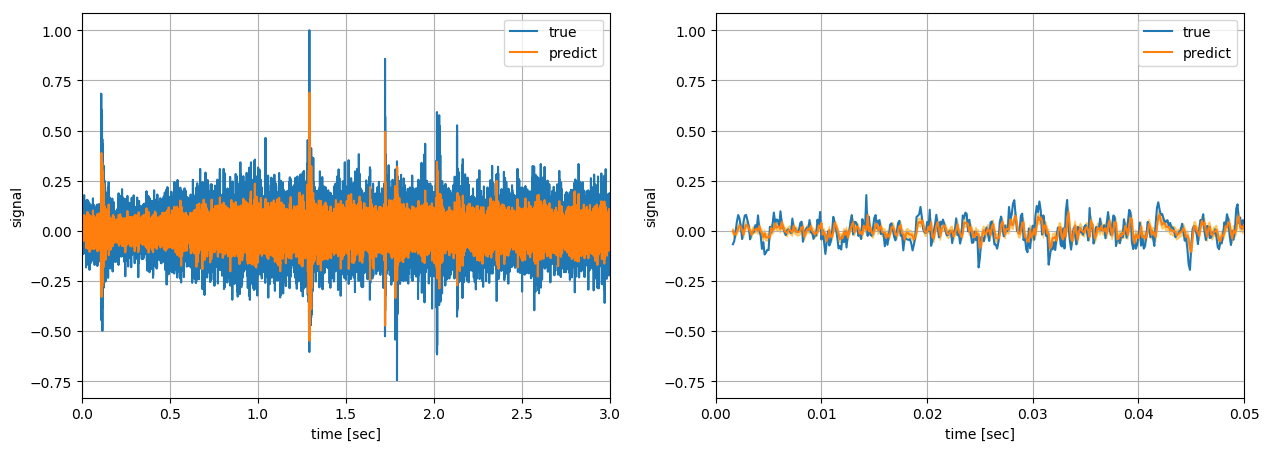

(nothing, PyObject <matplotlib.legend.Legend object at 0x0000000063BFF550>, (0.0, 0.05), PyObject Text(0.5, 24.0, 'time [sec]'), PyObject Text(658.0909090909089, 0.5, 'signal'))

In [12]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(t[length(f):end], yi[length(f):end], label="true")
ax[1].plot(t[length(f):end], Œº_x_mem[length(f):end], label="predict")
ax[1].grid(), ax[1].legend(), ax[1].set_xlim(0,3), ax[1].set_xlabel("time [sec]"), ax[1].set_ylabel("signal")
ax[2].plot(t[length(f):end], yi[length(f):end], label="true")
ax[2].plot(t[length(f):end], Œº_x_mem[length(f):end], label="predict")
ax[2].fill_between(t[length(f):end], Œº_x_mem[length(f):end] .+ sqrt.(Œ£_x_mem[length(f):end]), Œº_x_mem[length(f):end] .- sqrt.(Œ£_x_mem[length(f):end]), alpha=0.5, color="orange")
ax[2].grid(), ax[2].legend(), ax[2].set_xlim(0.0,0.05), ax[2].set_xlabel("time [sec]"), ax[2].set_ylabel("signal")

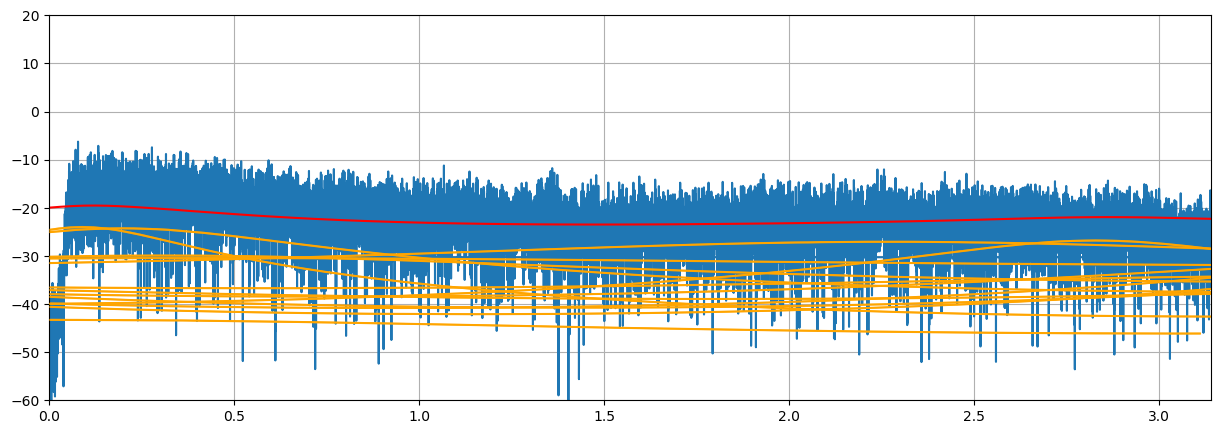

In [13]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

# calculate frequencies according to Bark
fB = 1/pi/2*2*atan.(( 1 - z_pole)/(1+z_pole) * tan.(pi*f/fs))*fs

tmp_psd = zeros(101)
for k = 1:length(f)
    Œ∏_sampled, Œ≥_sampled = AR_distributions([Œº_Œ∏_mem[end,k]], mat(1/Œ£_Œ∏_mem[end,k]), a_Œ≥[k], b_Œ≥[k])
    mean_psd, std_psd = summary_psd(Œ∏_sampled, Œ≥_sampled)
    mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
    std_psd = vcat(reverse(std_psd), std_psd[2:end])
    Œ∏x = collect(0:length(mean_psd)-1)/length(mean_psd)*2*pi .- pi .+ 2*pi*fB[k]/fs
    gca().plot(Œ∏x, mean_psd, color="orange", label="predicted psd")
    gca().fill_between(Œ∏x, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
    tmp_psd = tmp_psd + 10 .^(mean_psd[101-Int(round(fB[k]/fs*200)):201-Int(round(fB[k]/fs*200))]/10)
end
gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-60,20)
plt.xlim(0,pi)
plt.grid()

## Predictive performance

In [14]:
x_true = yi[length(f):end]
x_Œº_pred = Œº_x_mem[length(f):end]
x_œÉ_pred = sqrt.(abs.(Œ£_x_mem[length(f):end]));

In [15]:
MSE = mean(abs2.(x_true - x_Œº_pred))
MAE = mean(abs.(x_true - x_Œº_pred))
BME = mean([logpdf(Normal(x_Œº_pred[k], x_œÉ_pred[k]), x_true[k]) for k = 1:length(x_true)])

MSE, MAE, BME

(0.010615988394544156, 0.0774646301976537, -0.08075732172825907)